In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 


In [4]:
np.random.seed(42)

days = [f'Day {i+1}' for i in range(10)]
pollution_data = {
    'Day':days,
    'PM2.5':np.random.randint(50,300,size =10),
    'PM10':np.random.randint(40,450,size=10),
    'NO2':np.random.randint(20,150,size=10),
    'CO':np.round(np.random.uniform(0.5,2.5, size=10),2)

}

df = pd.DataFrame(pollution_data)
df.head()

,Day,PM2.5,PM10,NO2,CO
0,Day 1,152,254,21,1.30
1,Day 2,229,370,107,0.59
2,Day 3,142,127,57,2.45
3,Day 4,64,412,149,0.97
4,Day 5,156,139,40,0.68


In [ ]:
#Formula
df['AQI'] = (df['PM2.5'] * 0.5 + df['PM10'] * 0.3 + df['NO2'] * 0.1 + df['CO'] * 30).astype(int)


In [6]:
#naming monsters

def get_monster(aqi):
    if aqi <=50:
        return "CleanSky"
    elif aqi <=100:
        return "Smokeling"
    elif aqi <=200:
        return "Fumigator"
    elif aqi <=300:
        return "ChokeThorn"
    else:
        return "Vaporgeddon"
    
df['Monster']= df['AQI'].apply(get_monster)    
    


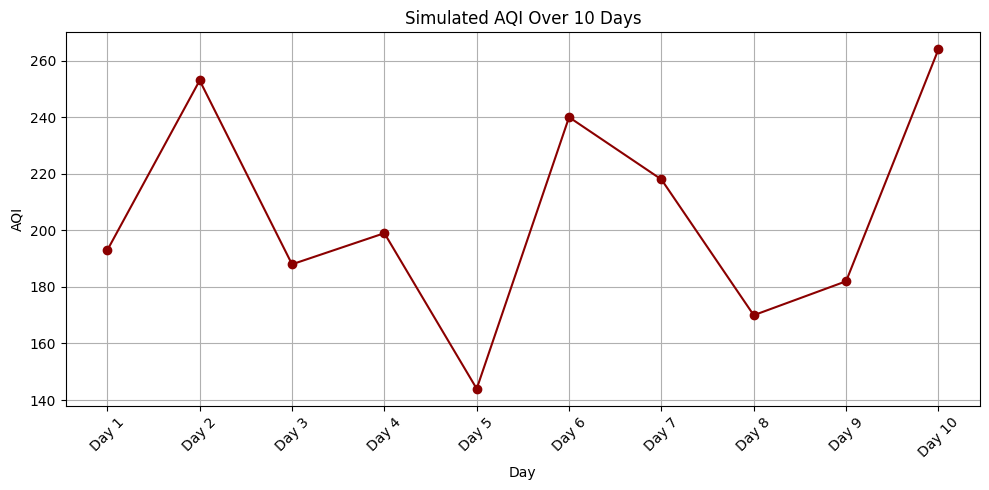

In [7]:
plt.figure(figsize=(10, 5))
plt.plot(df['Day'], df['AQI'], marker='o', color='darkred')
plt.title('Simulated AQI Over 10 Days')
plt.xlabel('Day')
plt.ylabel('AQI')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [8]:
print(df)


      Day  PM2.5  PM10  NO2    CO  AQI     Monster
0   Day 1    152   254   21  1.30  193   Fumigator
1   Day 2    229   370  107  0.59  253  ChokeThorn
2   Day 3    142   127   57  2.45  188   Fumigator
3   Day 4     64   412  149  0.97  199   Fumigator
4   Day 5    156   139   40  0.68  144   Fumigator
5   Day 6    121   399   77  1.74  240  ChokeThorn
6   Day 7    238   191   41  1.26  218  ChokeThorn
7   Day 8     70   170  108  2.47  170   Fumigator
8   Day 9    152   189   68  1.43  182   Fumigator
9  Day 10    171   348   78  2.22  264  ChokeThorn


In [9]:
today = 0  # Change this to select day
print(f"\nOn {df['Day'][today]}, the monster is: {df['Monster'][today]} with AQI {df['AQI'][today]}")



On Day 1, the monster is: Fumigator with AQI 193


In [23]:
#creating a eco action list 
eco_actions = [
    "Plant Trees",
    "Use Public transport",
    "Ban Firecrackers",
    "Switch to Solar Energy",
    "Do Nothing",
    "Car-free day",
    "Clean the city",
    "Eco Awareness Drive",
    "Recycle Campaign",
    "Clean your surroundings"
]
df['Eco_Action'] = np.random.choice(eco_actions, size=len(df))


In [24]:
def apply_eco_action(row):
    action = row['Eco_Action']
    
    # Copy current pollution values
    PM25, PM10, NO2, CO = row['PM2.5'], row['PM10'], row['NO2'], row['CO']
    
    if action == "Plant Trees":
        PM25 -= 30
        NO2 -= 10
    elif action == "Use Public Transport":
        PM10 -= 20
        CO -= 0.3
    elif action == "Ban Firecrackers":
        PM25 -= 50
        PM10 -= 40
    elif action == "Switch to Solar Energy":
        CO -= 0.5
        NO2 -= 15
    elif action == "Car-Free Day":
        CO -= 0.7
        PM10 -= 30
    elif action == "Clean the City":
        PM10 -= 25
    elif action == "Eco Awareness Drive":
        PM25 -= 10
        NO2 -= 5
    elif action == "Recycle Campaign":
        PM10 -= 15
    else:  # "Do Nothing"
        pass  # No changes

    # Clamp to avoid negative values
    PM25 = max(PM25, 0)
    PM10 = max(PM10, 0)
    NO2 = max(NO2, 0)
    CO = max(CO, 0)

    return pd.Series([PM25, PM10, NO2, CO], index=['PM2.5_After', 'PM10_After', 'NO2_After', 'CO_After'])


In [43]:

df[['PM2.5_After', 'PM10_After', 'NO2_After', 'CO_After']] = df.apply(apply_eco_action, axis=1)
df['AQI_After'] = (df['PM2.5_After'] * 0.4 + df['PM10_After'] * 0.3 + df['NO2_After'] * 0.05 + df['CO_After'] * 30).astype(int)
df['Monster_After'] = df['AQI_After'].apply(get_monster)


In [44]:
cols = ['Day', 'Eco_Action', 'AQI', 'Monster', 'AQI_After', 'Monster_After']
print(df[cols])


      Day               Eco_Action  AQI     Monster  AQI_After Monster_After
0   Day 1           Clean the city  193   Fumigator        177     Fumigator
1   Day 2               Do Nothing  253  ChokeThorn        225    ChokeThorn
2   Day 3         Recycle Campaign  188   Fumigator        166     Fumigator
3   Day 4           Clean the city  199   Fumigator        185     Fumigator
4   Day 5     Use Public transport  144   Fumigator        126     Fumigator
5   Day 6   Switch to Solar Energy  240  ChokeThorn        208    ChokeThorn
6   Day 7         Recycle Campaign  218  ChokeThorn        187     Fumigator
7   Day 8     Use Public transport  170   Fumigator        158     Fumigator
8   Day 9  Clean your surroundings  182   Fumigator        163     Fumigator
9  Day 10         Recycle Campaign  264  ChokeThorn        238    ChokeThorn


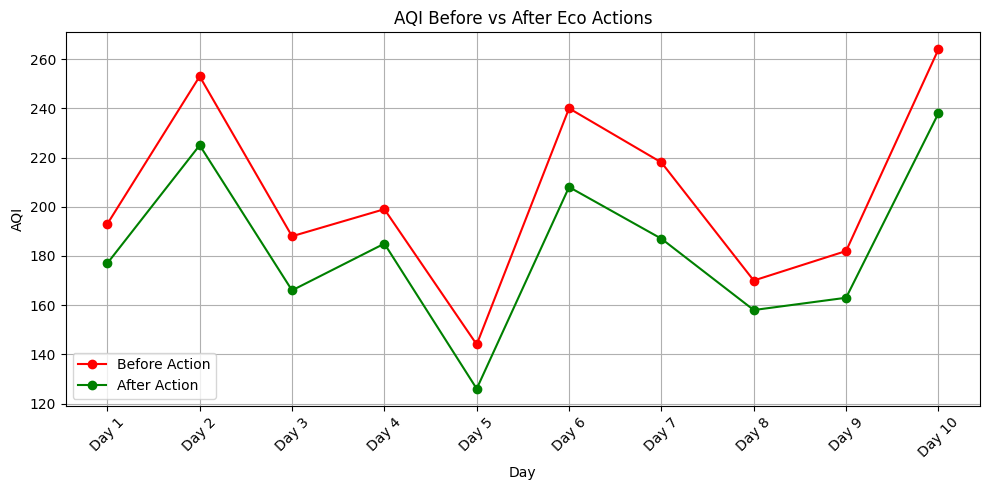

In [45]:
plt.figure(figsize=(10, 5))
plt.plot(df['Day'], df['AQI'], label='Before Action', marker='o', color='red')
plt.plot(df['Day'], df['AQI_After'], label='After Action', marker='o', color='green')
plt.title('AQI Before vs After Eco Actions')
plt.xlabel('Day')
plt.ylabel('AQI')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
